In [76]:
import pandas as pd
import numpy as np

In [77]:
# import CIE xyz color matching functions from csv file with x, y, z column names
cie_xyz = pd.read_csv('assets/CIE_xyz_1931_2deg.csv', index_col=0)

In [78]:
# print table head
cie_xyz.head()

,x,y,z
wavelength,,,
360,0.000130,0.000004,0.000606
361,0.000146,0.000004,0.000681
362,0.000164,0.000005,0.000765
363,0.000184,0.000006,0.000860
364,0.000207,0.000006,0.000967


In [79]:
# add column names x, y, z to the table reassign default index names to first wavelength row
cie_xyz.columns = ['x', 'y', 'z']
cie_xyz.index.names = ['wavelength']


In [80]:
cie_xyz.head()

,x,y,z
wavelength,,,
360,0.000130,0.000004,0.000606
361,0.000146,0.000004,0.000681
362,0.000164,0.000005,0.000765
363,0.000184,0.000006,0.000860
364,0.000207,0.000006,0.000967


In [81]:
# function to sample the CIE xyz color matching functions between 380nm and 780nm with a given number of samples
def sample_cie_xyz(w_start, w_end, n):
    # create a linearly spaced array of n values between 380 and 780
    wls = np.linspace(380, 780, n)
    # round the values to integers
    wls = np.round(wls).astype(int)
    # sample the CIE xyz color matching functions at the given wavelengths
    xyz = cie_xyz.loc[wls, :]
    # return the sampled CIE xyz color matching functions
    return xyz

In [225]:
# 16 samples 
samples = sample_cie_xyz(380, 780, 16)

In [226]:
# normalize the samples to sum y = 1
l = samples['y'].sum()
samples['y'] = samples['y'] / samples['y'].max()
# samples['x'] = samples['x'] / samples['x'].sum()
# samples['z'] = samples['z'] / samples['z'].sum()


In [227]:
samples

,x,y,z
wavelength,,,
380,0.001368,0.000040,0.006450
407,0.029782,0.000852,0.141702
433,0.313787,0.015095,1.542190
460,0.290800,0.061909,1.669200
487,0.046282,0.189397,0.550416
513,0.019478,0.583684,0.128994
540,0.290400,0.984346,0.020300
567,0.712059,1.000000,0.002439
593,1.047188,0.742907,0.001036


In [228]:
# print the samples dataframe as a glsl vec3 array const vec3 cieXYZ[SAMPLE_COUNT] = vec3[]( ... );
print('const vec3 cieXYZ[SAMPLE_COUNT] = vec3[](')
for i, row in samples.iterrows():
    print('    vec3({:.6f}, {:.6f}, {:.6f}){}'.format(row.x, row.y, row.z, ',' if i < samples.index[-1] else ''))
print(');')


const vec3 cieXYZ[SAMPLE_COUNT] = vec3[](
    vec3(0.001368, 0.000040, 0.006450),
    vec3(0.029782, 0.000852, 0.141702),
    vec3(0.313787, 0.015095, 1.542190),
    vec3(0.290800, 0.061909, 1.669200),
    vec3(0.046282, 0.189397, 0.550416),
    vec3(0.019478, 0.583684, 0.128994),
    vec3(0.290400, 0.984346, 0.020300),
    vec3(0.712059, 1.000000, 0.002439),
    vec3(1.047188, 0.742907, 0.001036),
    vec3(0.854450, 0.393119, 0.000190),
    vec3(0.328517, 0.129002, 0.000005),
    vec3(0.072077, 0.027167, 0.000000),
    vec3(0.011359, 0.004232, 0.000000),
    vec3(0.001781, 0.000664, 0.000000),
    vec3(0.000270, 0.000100, 0.000000),
    vec3(0.000042, 0.000015, 0.000000)
);


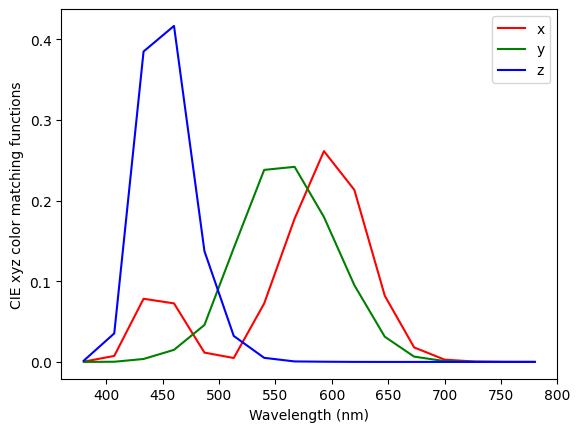

In [212]:
# plot the CIE xyz color matching functions x as red, y as green and z as blue
import matplotlib.pyplot as plt
plt.plot(samples.index, samples.x, 'r-', label='x')
plt.plot(samples.index, samples.y, 'g-', label='y')
plt.plot(samples.index, samples.z, 'b-', label='z')
plt.xlabel('Wavelength (nm)')
plt.ylabel('CIE xyz color matching functions')
plt.legend()
plt.show()


In [213]:
# integrate the area under x y and z respectively
x = samples['x'].sum()
y = samples['y'].sum()
z = samples['z'].sum()
# print the result
print('x: {:.6f}, y: {:.6f}, z: {:.6f}'.format(x, y, z))

x: 1.003623, y: 1.000000, z: 1.014430


In [282]:
# open solar spectrum xls file
solar_spectrum = pd.read_excel('assets/solar_spectrum.xls', index_col=0)


In [283]:
solar_spectrum.head()

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,ASTM E-490 AM0 Standard Spectra,Unnamed: 6
ASTM G173-03 Reference Spectra Derived from SMARTS v. 2.9.2 (AM1.5),,,,,,
Wavelength (nm),Extraterrestrial W*m-2*nm-1,Global tilt W*m-2*nm-1,Direct+circumsolar W*m-2*nm-1,NaN,Wavelength (nm),W*m-2*nm-1
280,0.082,0.0,0.0,NaN,119.5,0.000062
280.5,0.099,0.0,0.0,NaN,120.5,0.000561
281,0.15,0.0,0.0,NaN,121.5,0.004901
281.5,0.212,0.0,0.0,NaN,122.5,0.001184


In [289]:
# extract Direct+circumsolar W*m-2*nm-1 column for wavelengths between 380nm and 780nm
sol_spectrum = solar_spectrum.loc[380:780, 'Unnamed: 1']

In [290]:
# function to sample the sample the solar spectrum between 380nm and 780nm with a given number of samples
def sample_solar_spectrum(w_start, w_end, n):
    # create a linearly spaced array of n values between 380 and 780
    wls = np.linspace(380, 780, n)
    # round the values to integers
    wls = np.round(wls).astype(int)
    # sample the solar spectrum at the given wavelengths
    spectrum = sol_spectrum.loc[wls]
    # return the sampled solar spectrum
    return spectrum

In [291]:
sol_samples = sample_solar_spectrum(380, 780, 16)

In [292]:
# normalize the samples to sum = 1
n_sol_samples = sol_samples / sol_samples.max()


In [293]:
# output the solar spectrum as a glsl float array const float solarSpectrum[SAMPLE_COUNT] = float[]( ... );
print('const float solarSpectrum[SAMPLE_COUNT] = float[](')
for i in n_sol_samples:
    print('    {:.6f},'.format(i))
print(');')


const float solarSpectrum[SAMPLE_COUNT] = float[](
    0.576779,
    0.816102,
    0.846793,
    1.000000,
    0.895709,
    0.934261,
    0.901217,
    0.935263,
    0.897211,
    0.856656,
    0.804086,
    0.759525,
    0.711961,
    0.673109,
    0.633355,
    0.597306,
);


In [138]:
sky_spectrum = solar_spectrum.loc[380:780, 'Unnamed: 2']

In [139]:
def sample_sky_spectrum(w_start, w_end, n):
    # create a linearly spaced array of n values between 380 and 780
    wls = np.linspace(380, 780, n)
    # round the values to integers
    wls = np.round(wls).astype(int)
    # sample the solar spectrum at the given wavelengths
    spectrum = sky_spectrum.loc[wls]
    # return the sampled solar spectrum
    return spectrum

In [140]:
sky_samples = sample_solar_spectrum(380, 780, 16)

In [141]:
# output the sky spectrum as a glsl float array const float solarSpectrum[SAMPLE_COUNT] = float[]( ... );
print('const float skySpectrum[SAMPLE_COUNT] = float[](')
for i in sky_samples:
    print('    {:.6f},'.format(i))
print(');')


const float skySpectrum[SAMPLE_COUNT] = float[](
    0.497510,
    0.845450,
    0.990500,
    1.279100,
    1.223500,
    1.327700,
    1.309600,
    1.367300,
    1.308600,
    1.329900,
    1.274400,
    1.276000,
    1.163600,
    0.989880,
    1.121000,
    1.068700,
);


In [203]:
# load D65 illuminant with whitespace separator
d65 = pd.read_csv('assets/CIE-D65.csv', sep='\s+', index_col=0)


In [204]:
# function to sample the sample the d65 spectrum between w_start and w_end with a given number of samples
def sample_d65_spectrum(w_start, w_end, n):
    # create a linearly spaced array of n values between 380 and 780
    wls = np.linspace(w_start, w_end, n)
    # round the values to integers
    wls = np.round(wls).astype(int)
    # lerp the d65 spectrum to the given wavelengths
    print(wls)
    interp = d65.reindex(wls).interpolate(method='linear')
    print(interp)
    # sample the solar spectrum at the given wavelengths
    spectrum = interp.loc[wls, 'radiance']
    # return the sampled solar spectrum
    return spectrum

In [205]:
# sample radiance at 16 wavelengths between 380nm and 780nm
d65_samples = sample_d65_spectrum(380, 780, 16).values

[380 407 433 460 487 513 540 567 593 620 647 673 700 727 753 780]
       radiance
380   49.975500
407   72.587667
433   95.199833
460  117.812000
487  113.343000
513  108.874000
540  104.405000
567   98.836233
593   93.267467
620   87.698700
647   82.335500
673   76.972300
700   71.609100
727   68.867000
753   66.124900
780   63.382800


In [206]:
# print as glsl float array
print('const float d65[SAMPLE_COUNT] = float[](')
for i in d65_samples:
    print('    {:.6f},'.format(i))
print(');')


const float d65[SAMPLE_COUNT] = float[](
    49.975500,
    72.587667,
    95.199833,
    117.812000,
    113.343000,
    108.874000,
    104.405000,
    98.836233,
    93.267467,
    87.698700,
    82.335500,
    76.972300,
    71.609100,
    68.867000,
    66.124900,
    63.382800,
);


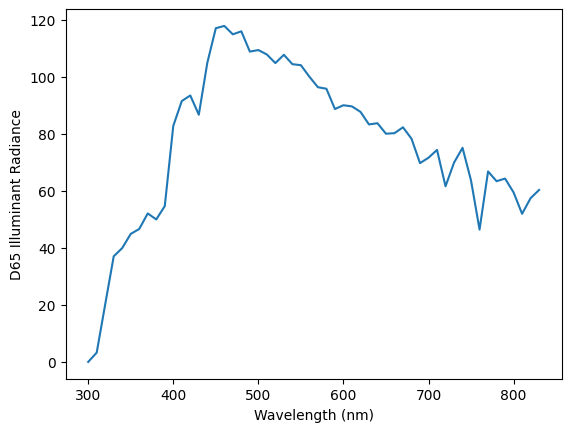

In [207]:
# plot the d65 spectrum
plt.plot(d65.index, d65.radiance)
plt.xlabel('Wavelength (nm)')
plt.ylabel('D65 Illuminant Radiance')
plt.show()


In [255]:
led_db = pd.read_csv('assets/led_spd_350_700.csv', index_col=0)

In [278]:
# db is in format where a row is an led device and columns are wavelengths
# assign index and
# change to columns being led devices and rows being wavelengths
# insert wavelength column and transpose

led_db['wavelength'] = led_db.index
led_db = led_db.set_index(np.arange(len(led_db)))
led_db = led_db.transpose()
led_db.head()



,0,1,2,3,4,5,6,7,8,9,...,166,167,168,169,170,171,172,173,174,175
0,0.000344,0.0,0.0,0.000293,0.0,0.000745,0.0,0.0,0.000053,0.0,...,0.000757,0.000514,0.000426,0.000282,0.000118,0.000254,0.000173,0.000044,0.000164,0.0
1,0.000178,0.000104,0.00012,0.0,0.0,0.0,0.0,0.000297,0.000058,0.000109,...,0.001343,0.000918,0.000749,0.000551,0.000343,0.000201,0.000236,0.000104,0.000125,0.0
2,0.0,0.000149,0.000154,0.0,0.0,0.000831,0.0,0.000247,0.0,0.0,...,0.0,0.000042,0.000169,0.000059,0.000183,0.00001,0.000149,0.000001,0.000037,0.0
3,0.0,0.0,0.000096,0.000076,0.0,0.0,0.0,0.000162,0.0,0.000035,...,0.0,0.0,0.000077,0.000103,0.0,0.000028,0.0,0.000019,0.0,0.0
4,0.000383,0.000213,0.0,0.0,0.0,0.000097,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000148,0.0,0.0,0.000011,0.0,0.000097,0.000281


In [279]:
# transpose table
led_db = led_db.T
led_db

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,wavelength
0,0.000344,0.000178,0.0,0.0,0.000383,0.000041,0.0,0.000111,0.000059,0.00006,...,0.000296,0.000046,0.000003,0.000123,0.0,0.0,0.0,0.000355,0.000142,352
1,0.0,0.000104,0.000149,0.0,0.000213,0.000086,0.000011,0.0,0.000107,0.000042,...,0.0001,0.000127,0.000107,0.000131,0.000093,0.000185,0.0,0.000021,0.000326,354
2,0.0,0.00012,0.000154,0.000096,0.0,0.000075,0.000026,0.000038,0.000046,0.0,...,0.0,0.0,0.00017,0.0,0.000159,0.000084,0.000081,0.000166,0.000129,356
3,0.000293,0.0,0.0,0.000076,0.0,0.0,0.000017,0.0,0.000074,0.00002,...,0.0,0.000064,0.000073,0.000129,0.000002,0.000155,0.000122,0.000173,0.000204,358
4,0.0,0.0,0.0,0.0,0.0,0.000011,0.0,0.0,0.0,0.000041,...,0.000049,0.0,0.000065,0.000104,0.000143,0.0,0.000283,0.000008,0.000199,360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,0.000254,0.000201,0.00001,0.000028,0.0,0.006286,0.002196,0.002761,0.002853,0.000079,...,0.000026,0.000068,0.0,0.000029,0.000013,0.000011,0.000013,0.000057,0.000112,694
172,0.000173,0.000236,0.000149,0.0,0.000011,0.006018,0.001988,0.002602,0.002698,0.000182,...,0.000038,0.000002,0.000001,0.0,0.000013,0.000013,0.0,0.000044,0.000084,696
173,0.000044,0.000104,0.000001,0.000019,0.0,0.005729,0.001845,0.002339,0.002438,0.000283,...,0.000145,0.0,0.0,0.0,0.000011,0.0,0.00013,0.000014,0.0,698
174,0.000164,0.000125,0.000037,0.0,0.000097,0.005552,0.001722,0.002272,0.002364,0.000049,...,0.0,0.0,0.000063,0.000001,0.00001,0.0,0.0,0.000034,0.000075,700


In [280]:
# function to plot all led devices in the led_db
def plot_leds():
    # plot all led devices
    for led in led_db.index:
        plt.plot(led_db.columns, led_db.loc[led], label=led)
    # plot the CIE xyz color matching functions x as red, y as green and z as blue
    plt.plot(samples.index, samples.x, 'r-', label='x')
    plt.plot(samples.index, samples.y, 'g-', label='y')
    plt.plot(samples.index, samples.z, 'b-', label='z')
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Spectral Power Distribution')
    plt.legend()
    plt.show()


ValueError: could not convert string to float: 'wavelength'

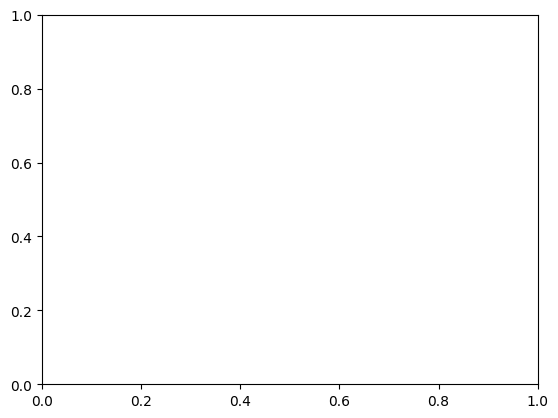

In [281]:
plot_leds()